In [60]:
def quaternion_to_euler(x, y, z, w):

        import math
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll = math.degrees(math.atan2(t0, t1))

        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch = math.degrees(math.asin(t2))

        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw = math.degrees(math.atan2(t3, t4))

        return roll, pitch, yaw

In [61]:
def readHeadMotion(filename):

    import csv

    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        data = []
        t=[]
        pitch=[]
        yaw=[]
        roll=[]
        for row in reader:
            t.append(row[1])
            troll, tpitch, tyaw = quaternion_to_euler(float(row[2]),float(row[3]),float(row[4]),float(row[5]))
            yaw.append(tyaw)
            pitch.append(tpitch)
            roll.append(troll)
            
    return t, pitch, yaw


In [84]:
def tileMap(t, pitch, yaw, H, W):

    import math
    import numpy
    
    seg = []
    occuTiles = []
    tseg = -1
    toccuTilesU = numpy.zeros((H,W))
    
    for tim in t:
        toccuTiles = numpy.ones((H,W))
        tpitch = H*(math.radians(pitch.pop(0))/math.pi/2+1)/2
        tyaw = W*(math.radians(yaw.pop(0))/math.pi+1)/2
        hmin = tpitch-0.14*H
        hmax = tpitch+0.14*H
        wmin = tyaw-0.14*W
        wmax = tyaw+0.14*W
        hminfloor = math.floor(hmin)
        wminfloor = math.floor(wmin)
        
        for hh in range(H):
            for ww in range(W):
                if hmax-hminfloor<hh:
                    toccuTiles[hh][ww] = 0
                if wmax-wminfloor<ww:
                    toccuTiles[hh][ww] = 0
                    
        toccuTiles = numpy.roll(toccuTiles, hminfloor, axis=0)
        toccuTiles = numpy.roll(toccuTiles, wminfloor, axis=1)

        toccuTilesU = numpy.logical_or(toccuTilesU,toccuTiles)
        toccuTilesU = numpy.multiply(toccuTiles,numpy.ones((H,W)))
        
        if tseg<math.floor(float(tim)):
            tseg = math.floor(float(tim))
            occuTiles.append(toccuTilesU)
            toccuTileU = numpy.zeros((H,W))
            seg.append(tseg)
    
    return seg, occuTiles

In [85]:
t, pitch, yaw = readHeadMotion("video_0.csv")
seg, occuTiles = tileMap(t, pitch, yaw, 6, 12)

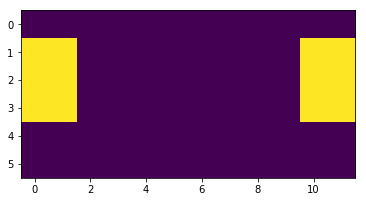

In [101]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(occuTiles[0])